In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## word cloud1

In [11]:
# Read data into a pandas dataframe
df1 = pd.read_csv('output2_cleaned.csv')
df1 = df1.dropna(subset =['word'])
df1

,word,count
0,deaths,3402.0
1,positive,2783.0
2,realDonaldTrump,2398.0
3,health,1876.0
4,help,1825.0
5,virus,1399.0
6,lockdown,1182.0
7,death,1147.0
8,safe,1125.0
9,Health,1091.0


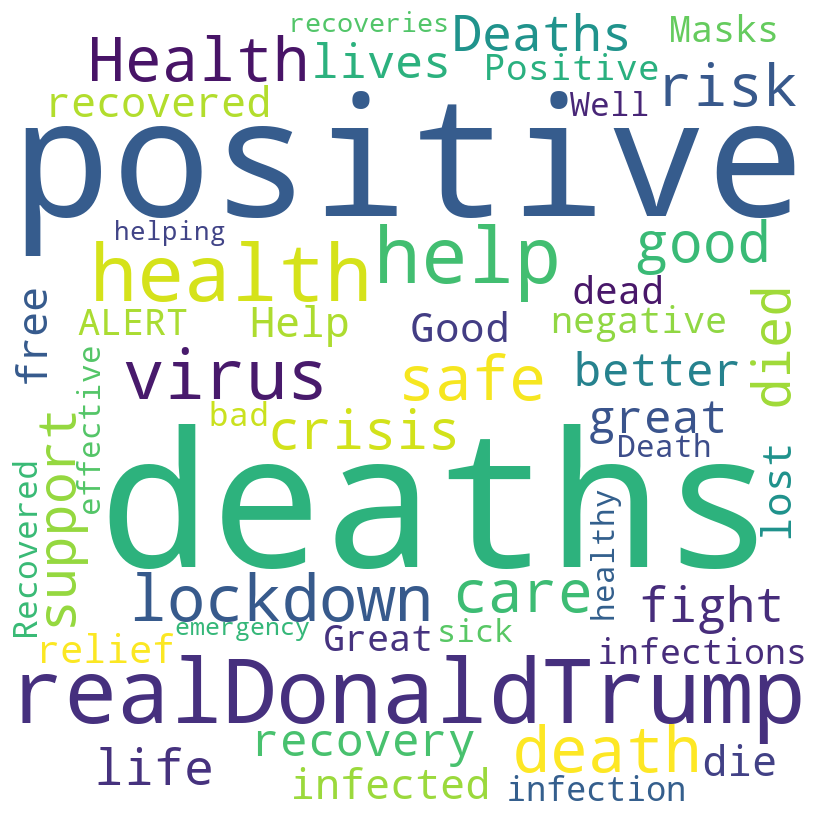

In [12]:
# Create a dictionary of word frequencies
word_freq = dict(zip(df1['word'], df1['count']))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## word cloud2 

In [19]:
# Read data into a pandas dataframe
df2 = pd.read_csv('output3_cleaned.csv')
df2 = df2.dropna(subset =['word'])
df2

,word,count
0,deaths,482.542555
1,positive,425.558589
2,realDonaldTrump,387.038237
3,health,301.415154
4,help,296.289468
...,...,...
75,cure,61.888473
76,started,60.507627
77,left,60.481601
78,needed,60.254855


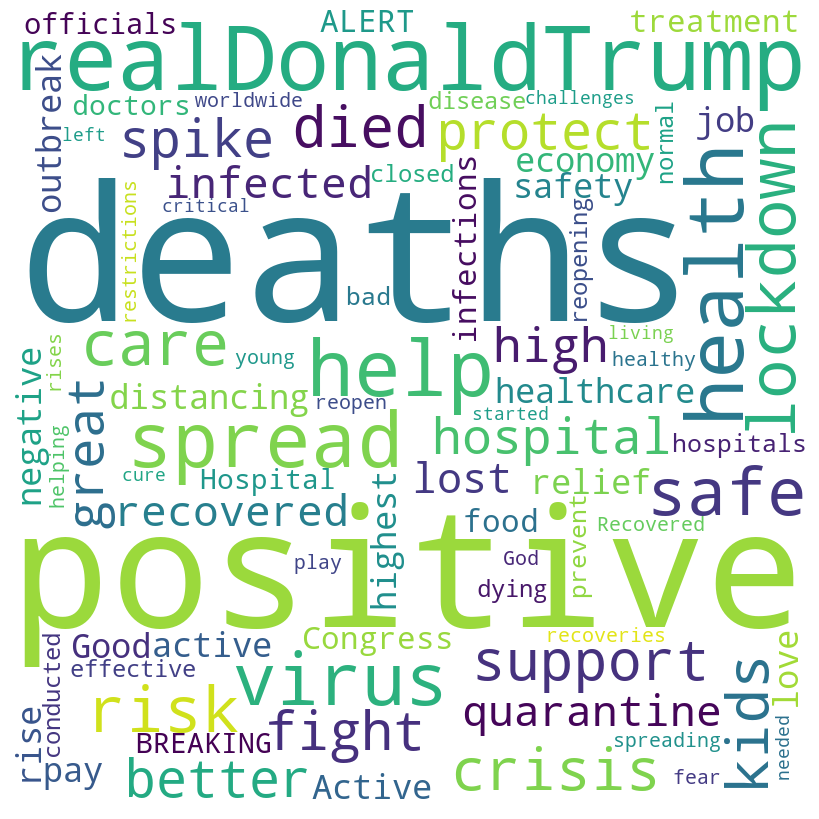

In [20]:
# Create a dictionary of word frequencies
word_freq = dict(zip(df2['word'], df2['count']))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# updated histogram of label 

In [4]:
# Read data into a pandas dataframe
df3 = pd.read_csv('output1withlabel.csv')
df3

,Unnamed: 0,Id,Time,Sentiment,date
0,0,0,2020725,Positive,2020-07-25
1,1,1,2020725,Positive,2020-07-25
2,2,2,2020725,Negative,2020-07-25
3,3,3,2020725,Negative,2020-07-25
4,4,4,2020725,Negative,2020-07-25
...,...,...,...,...,...
102596,102596,102596,2020810,Neutral,2020-08-10
102597,102597,102597,2020810,Neutral,2020-08-10
102598,102598,102598,2020810,Extremely Positive,2020-08-10
102599,102599,102599,2020810,Negative,2020-08-10


In [5]:
df3['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral', 'Extremely Positive',
       'Extremely Negative'], dtype=object)

In [8]:
# create a dictionary to map sentiment values to label values
sentiment_to_label = {
    'Extremely Positive': 'positive',
    'Positive': 'positive',
    'Extremely Negative': 'negative',
    'Negative': 'negative',
    'Neutral': 'neutral'
}

# create the label column by mapping the sentiment values using the dictionary
df3['label'] = df3['Sentiment'].map(sentiment_to_label)
df3['label']

0         positive
1         positive
2         negative
3         negative
4         negative
            ...   
102596     neutral
102597     neutral
102598    positive
102599    negative
102600    negative
Name: label, Length: 102601, dtype: object

In [16]:
df3['date']

0         2020-07-25
1         2020-07-25
2         2020-07-25
3         2020-07-25
4         2020-07-25
             ...    
102596    2020-08-10
102597    2020-08-10
102598    2020-08-10
102599    2020-08-10
102600    2020-08-10
Name: date, Length: 102601, dtype: object

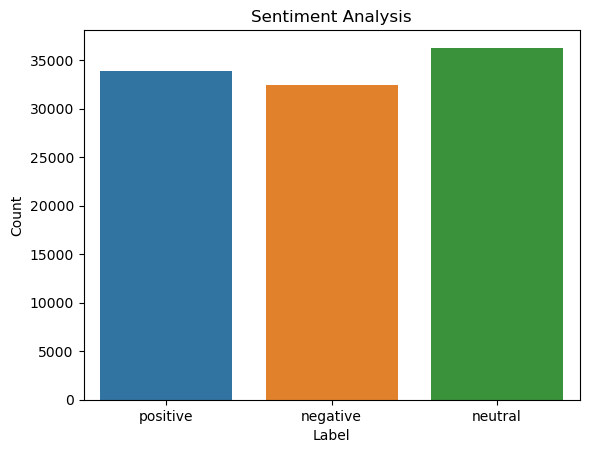

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create a dictionary to map sentiment values to colors
sentiment_to_color = {
    'Extremely Positive': '#4daf4a',
    'Positive': '#4daf4a',
    'Extremely Negative': '#e41a1c',
    'Negative': '#e41a1c',
    'Neutral': '#377eb8'
}

# create the count plot
sns.countplot(x=df3['label'])

# set the labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Sentiment Analysis')

# show the plot
plt.show()


In [30]:
# change sentiment to label to get 3 label
df_plot = (df3.reset_index().groupby(['date', 'Sentiment'], as_index=False).count().rename(columns={'index': 'count'}))

# group by date and sentiment and calculate the sum of count for each group
grouped = df_plot.groupby(['date'])['count'].transform('sum')
grouped

# divide count by the sum of count for each group and multiply by 100 to get the percentage
df_plot['percent'] = df_plot['count'] / grouped * 100

# round percent to 2 decimal places
df_plot['percent'] = df_plot['percent'].round(2)

df_plot

,date,Sentiment,count,Unnamed: 0,Id,Time,label,percent
0,2020-07-24,Extremely Negative,26,26,26,26,26,8.81
1,2020-07-24,Extremely Positive,31,31,31,31,31,10.51
2,2020-07-24,Negative,82,82,82,82,82,27.80
3,2020-07-24,Neutral,99,99,99,99,99,33.56
4,2020-07-24,Positive,57,57,57,57,57,19.32
...,...,...,...,...,...,...,...,...
75,2020-08-10,Extremely Negative,365,365,365,365,365,7.46
76,2020-08-10,Extremely Positive,515,515,515,515,515,10.53
77,2020-08-10,Negative,1110,1110,1110,1110,1110,22.69
78,2020-08-10,Neutral,1695,1695,1695,1695,1695,34.66


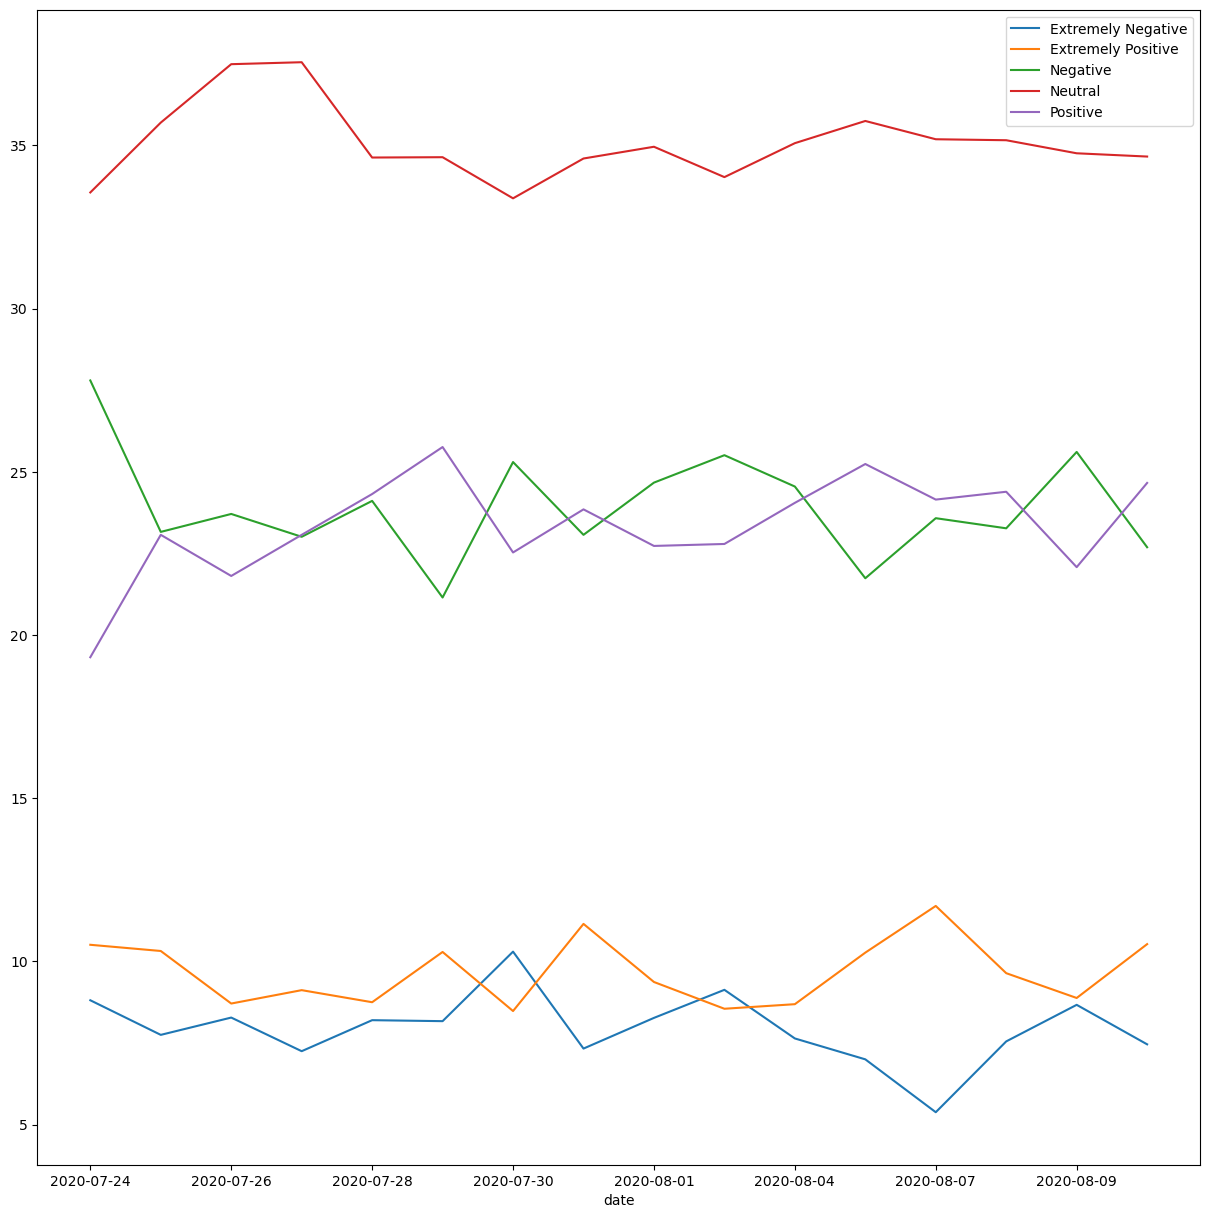

In [31]:
# change sentiment to label to get 3 label plot
fig, ax = plt.subplots()
for key, data in df_plot.groupby('Sentiment'):
    data.plot(x='date', y='percent', ax=ax, label=key, figsize=(15, 15))